In [1]:
# Importing Libraries
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

In [2]:
# Loading data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)


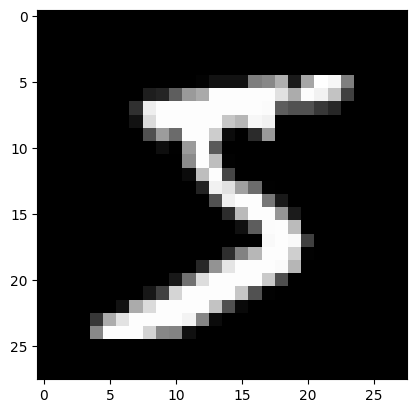

In [3]:
plt.imshow(train_images[0], cmap='gray')

In [4]:
# Preprocessing the dataset
train_images = train_images.reshape((60000, 28, 28,1))
train_images = train_images.astype('float32') / 255

test_images = test_images.reshape((10000, 28 ,28, 1))
test_images = test_images.astype('float32') / 255

In [5]:
# One-hot encoding the labels
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [6]:
# Importing Libraries
from keras import layers
from keras import models

# Building the Neural Network
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
# Compiling the model
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [8]:
# Training the model
history = model.fit(train_images, train_labels, epochs=5, batch_size=64, validation_data=(test_images, test_labels))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 70s 69ms/step - accuracy: 0.8647 - loss: 0.4167 - val_accuracy: 0.9872 - val_loss: 0.0412
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 75s 62ms/step - accuracy: 0.9847 - loss: 0.0516 - val_accuracy: 0.9892 - val_loss: 0.0378
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 80s 60ms/step - accuracy: 0.9906 - loss: 0.0318 - val_accuracy: 0.9837 - val_loss: 0.0498
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 60ms/step - accuracy: 0.9935 - loss: 0.0206 - val_accuracy: 0.9920 - val_loss: 0.0277
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 59ms/step - accuracy: 0.9948 - loss: 0.0171 - val_accuracy: 0.9903 - val_loss: 0.0303


In [9]:
# Evaluating the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9876 - loss: 0.0361
Test accuracy: 0.9902999997138977


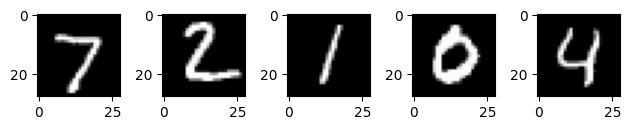

In [10]:
# Showing targets
for i in range(5):
  plt.subplot(1, 5, i+1)
  plt.imshow(test_images[i], cmap='gray')
plt.tight_layout()

In [11]:
# Making predictions
predictions = model.predict(test_images[:5])
final_predictions = []

for row in predictions:
  final_predictions.append(np.argmax(row))

print(final_predictions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
[7, 2, 1, 0, 4]
